In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


# generate data

X , y = make_blobs(n_samples=50 , centers=2 , random_state=6)
y[y == 0] = -1  # SVM requires labels to be -1 and 1


In [6]:
# Build the SVM model from scratch
def svm(X, y, C=1.0, lr=0.001, n_iters=1000):
    n_samples, n_features = X.shape 
    w = np.zeros(n_features)
    b = 0

    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y[idx] * (np.dot(x_i, w) + b) >= 1
            if condition:
                # Correctly apply regularization for support vectors
                w -= lr * (2 * w / n_iters)  # L2 regularization term
            else:
                # Apply both regularization and hinge loss gradient
                w -= lr * (2 * w / n_iters - C * y[idx] * x_i)   
                b -= lr * (-C * y[idx])  # Fixed sign

    return w, b

In [7]:
# predict function
def predict(X , w , b):
    return np.sign(np.dot(X , w) + b)

# train the SVM model
w , b = svm(X , y)

# make predictions
predictions = predict(X , w , b)

# Calculate accuracy
accuracy = np.mean(predictions == y)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 1.00


Weights (w): [-1.090, -1.363]
Bias (b): -0.428
Number of potential support vectors: 3


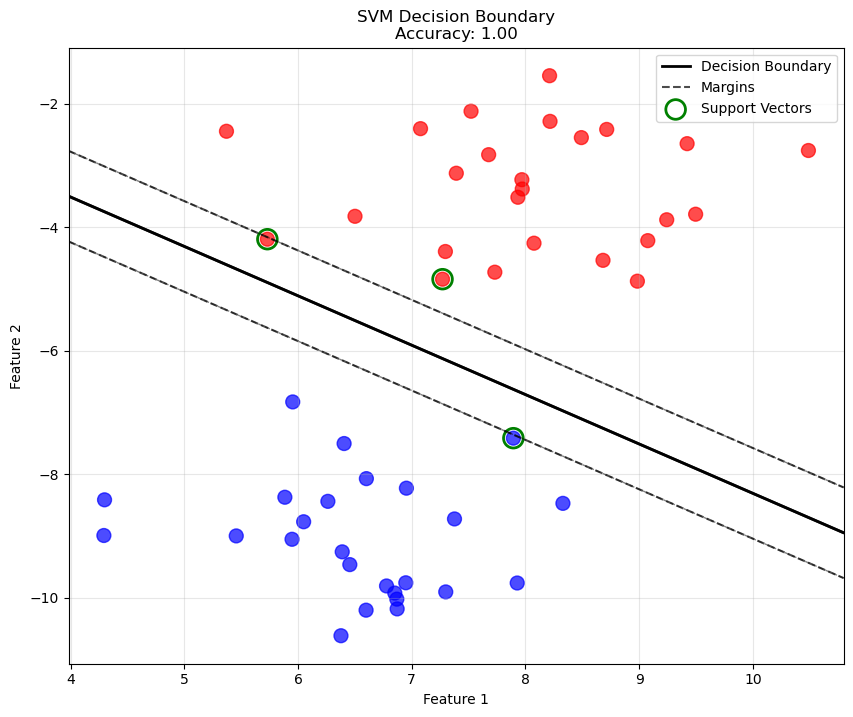

In [8]:
# Plotting
plt.figure(figsize=(10, 8))

# 1. Plot the data points
colors = ['red' if label == -1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7)

# 2. Plot decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of points
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Calculate decision function values
Z = np.dot(xy, w) + b
Z = Z.reshape(XX.shape)

# Plot decision boundary (where decision function = 0)
plt.contour(XX, YY, Z, colors='black', levels=[0], alpha=0.8, linestyles='-', linewidths=2)

# Plot margin boundaries (where decision function = ±1)
plt.contour(XX, YY, Z, colors='black', levels=[-1, 1], alpha=0.5, linestyles='--', linewidths=1)

# Alternative method: Plot lines using the equation w·x + b = 0
if abs(w[1]) > 1e-6:  # Avoid division by zero
    x_vals = np.linspace(xlim[0], xlim[1], 100)
    # Decision boundary: w[0]*x + w[1]*y + b = 0 → y = -(w[0]*x + b)/w[1]
    y_boundary = -(w[0] * x_vals + b) / w[1]
    # Margins: w[0]*x + w[1]*y + b = ±1 → y = -(w[0]*x + b ± 1)/w[1]
    y_margin_up = -(w[0] * x_vals + b - 1) / w[1]
    y_margin_down = -(w[0] * x_vals + b + 1) / w[1]
    
    # Only plot if within reasonable bounds
    mask = (y_boundary >= ylim[0]) & (y_boundary <= ylim[1])
    if np.any(mask):
        plt.plot(x_vals[mask], y_boundary[mask], 'k-', linewidth=2, label='Decision Boundary')
        plt.plot(x_vals[mask], y_margin_up[mask], 'k--', alpha=0.7, label='Margins')
        plt.plot(x_vals[mask], y_margin_down[mask], 'k--', alpha=0.7)

# Identify support vectors (points close to the margins)
distances = np.abs(np.dot(X, w) + b) / np.linalg.norm(w)
support_vector_indices = np.where(distances < 1.1)[0]  # Points close to margin

# Highlight support vectors
if len(support_vector_indices) > 0:
    plt.scatter(X[support_vector_indices, 0], X[support_vector_indices, 1], 
                s=200, facecolors='none', edgecolors='green', linewidths=2, 
                label='Support Vectors')

plt.title(f"SVM Decision Boundary\nAccuracy: {accuracy:.2f}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Print model parameters
print(f"Weights (w): [{w[0]:.3f}, {w[1]:.3f}]")
print(f"Bias (b): {b:.3f}")
print(f"Number of potential support vectors: {len(support_vector_indices)}")

plt.show()


In [9]:
from sklearn import svm 

# Train the SVM model using sklearn for comparison
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)
# Make predictions using sklearn model
sklearn_predictions = clf.predict(X)
# Calculate accuracy for sklearn model
sklearn_accuracy = np.mean(sklearn_predictions == y)
print(f"Sklearn Training Accuracy: {sklearn_accuracy:.2f}") 


Sklearn Training Accuracy: 1.00


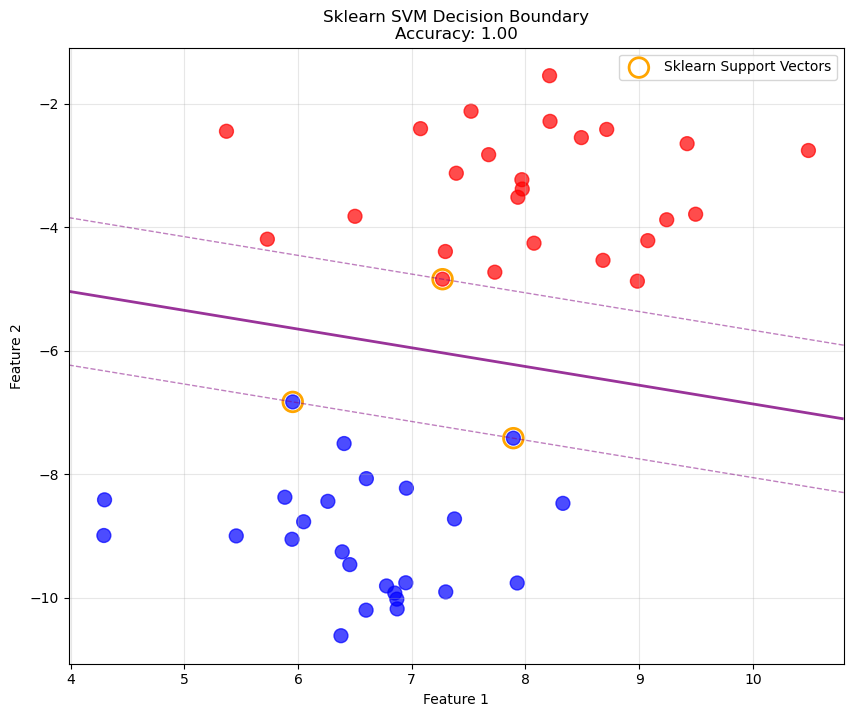

In [10]:
plt.figure(figsize=(10, 8))

# Plot data points
colors_sklearn = ['red' if label == -1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors_sklearn, s=100, alpha=0.7)

# Plot decision boundary and margins from sklearn model
w_sklearn = clf.coef_[0]
b_sklearn = clf.intercept_[0]

Z_sklearn = np.dot(xy, w_sklearn) + b_sklearn
Z_sklearn = Z_sklearn.reshape(XX.shape)

plt.contour(XX, YY, Z_sklearn, colors='purple', levels=[0], alpha=0.8, linestyles='-', linewidths=2)
plt.contour(XX, YY, Z_sklearn, colors='purple', levels=[-1, 1], alpha=0.5, linestyles='--', linewidths=1)

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=200, facecolors='none', edgecolors='orange', linewidths=2, 
            label='Sklearn Support Vectors')

plt.title(f"Sklearn SVM Decision Boundary\nAccuracy: {sklearn_accuracy:.2f}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()